In [ ]:
!pip install pycryptodome

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.8 MB/s eta 0:00:00


# Importing dependencies

In [ ]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
#import sounddevice as sd

import random
import string
from Crypto.Cipher import DES3

import IPython.display as ipd
import librosa
import librosa.display

## Taking input

<ipython-input-4-488a6e68ab6d>:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read(path)


Text(0.5, 1.0, 'Original Audio Plot')

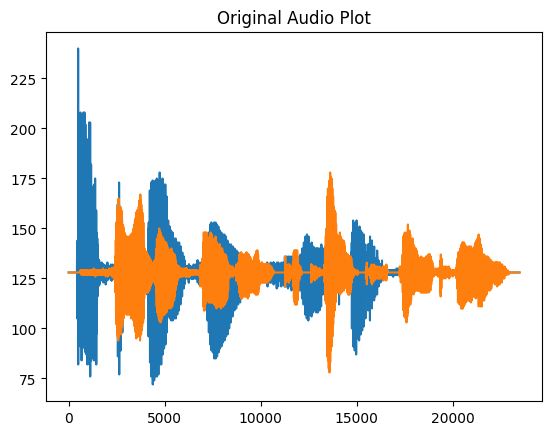

In [ ]:
path='/content/8bitaudio.wav'
fs, data = wavfile.read(path)
plt.plot(data)            # fs = sampling frequency = 44.1kHz
plt.title("Original Audio Plot")

In [ ]:
with open(path, 'rb') as fd:
    contents = fd.read()

## Playing that sound

In [ ]:
# Original Sound
samples, sample_rate = librosa.load(path)
ipd.Audio(samples, rate=sample_rate)

## Getting ready with DES

In [ ]:
from Crypto.Random import get_random_bytes
while True:
  try:
    Key = DES3.adjust_key_parity(get_random_bytes(24))
    break
  except ValueError:
    pass

In [ ]:
Key

b'\xb9\xbc^\xe6\x01\xdfLp\x8a\xd0\x91;\x92\x83\xbf8\xe0\xf1y2T\x13F\xa2'

# ENCRYPTION

In [ ]:
def encrypt(msg):
  cipher =DES3.new(Key,DES3.MODE_EAX)
  nonce=cipher.nonce
  ciphertext=cipher.encrypt(msg)
  return nonce,ciphertext

In [ ]:
nonce,ciphertext = encrypt(contents)
with open('/content/encrypted_audio_file.wav', 'wb') as fd:
    fd.write(ciphertext)

# DECRYPTION

In [ ]:
def decrypt(nonce,ciphertext):
   cipher=DES3.new(Key,DES3.MODE_EAX,nonce=nonce)
   plaintext=cipher.decrypt(ciphertext)
   return plaintext

In [ ]:
plaintext = decrypt(nonce,ciphertext)
with open('decrypted_audio_file.wav', 'wb') as fd:
    fd.write(plaintext)
print("A file titled 'encrypted_audio_file.wav' is generated which is the encrypted audio to be communicated")


A file titled 'encrypted_audio_file.wav' is generated which is the encrypted audio to be communicated


In [ ]:
samples, sample_rate = librosa.load('decrypted_audio_file.wav')
ipd.Audio(samples, rate=sample_rate)